In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv("C:\\Users\\mahes\\ML\\dataset\\data unziped\\house price\\train.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

In [5]:
# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)
y = (df['SalePrice']) 
x = pipeline.fit_transform(X)

c:\Users\mahes\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
x.shape

(1460, 304)

In [7]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2  # Import the L2 regularization

# Define the regularization strength
l2_lambda = 0.01

In [10]:
model = Sequential([
    InputLayer(input_shape=x.shape[1:]),
    Dense(100, activation='relu',kernel_regularizer=l2(l2_lambda)),
    Dense(75, activation='relu',kernel_regularizer=l2(l2_lambda)),
    Dense(50, activation='relu',kernel_regularizer=l2(l2_lambda)),
    Dense(25, activation='relu',kernel_regularizer=l2(l2_lambda)),
    Dense(15, activation='relu',kernel_regularizer=l2(l2_lambda)),
    Dense(1, activation='relu',kernel_regularizer=l2(l2_lambda))
])

In [11]:
from tensorflow.keras.losses import MeanSquaredError
model.compile(optimizer=Adam(learning_rate=0.01),loss = MeanSquaredError())

In [12]:
history = model.fit(x, y, epochs=100, validation_split=0.2)

Epoch 1/100
37/37 [==============================] - 2s 13ms/step - loss: 21546110976.0000 - val_loss: 4091255040.0000
Epoch 2/100
37/37 [==============================] - 0s 6ms/step - loss: 1537027200.0000 - val_loss: 2270580224.0000
Epoch 3/100
37/37 [==============================] - 0s 7ms/step - loss: 900451520.0000 - val_loss: 2286977280.0000
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 693820608.0000 - val_loss: 2160124928.0000
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 677498880.0000 - val_loss: 2099652480.0000
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 634478784.0000 - val_loss: 2174995200.0000
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 569209984.0000 - val_loss: 2079293440.0000
Epoch 8/100
37/37 [==============================] - 0s 5ms/step - loss: 581866112.0000 - val_loss: 2058436608.0000
Epoch 9/100
37/37 [==============================] - 0s 4ms/step - l

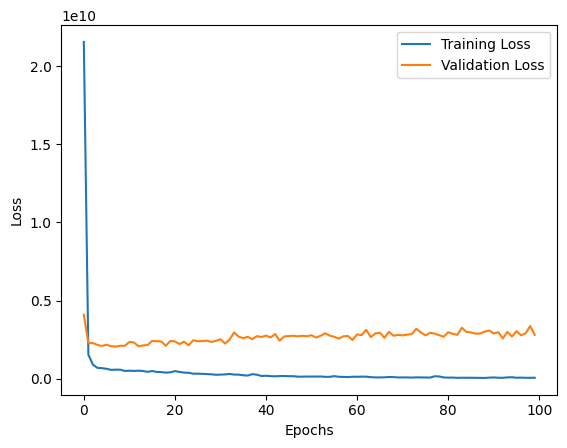

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [14]:
predicted = model.predict(x)

46/46 [==============================] - 0s 1ms/step


In [15]:
predicted

array([[210567.9 ],
       [178415.98],
       [221788.56],
       ...,
       [254584.69],
       [156930.66],
       [146386.38]], dtype=float32)

In [16]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [17]:
error = 0
for i in range(len(predicted)):
    error +=  (y[i] - predicted[i])**2
error = error/(len(predicted)*2)

In [25]:
error[0]

300741449.9447302

In [19]:
from sklearn.metrics import r2_score

# Assuming you have already made predictions using your model
# y_pred is the predicted values, and y_true is the true target values

# Calculate the R2 score
r2 = r2_score(y, predicted)

print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.9046292908483112
